# Neural Network

### Description 
**Цель:** Исследование данных по HR_requirments через нейронные сети

**Вход:** Таблица с различными критериями

**Задачи:**
- Найти идеальный вариант между кол-вом слоёв, нейронов и значением alpha
- Обнаружить недообучение и переобучение

## Решения, которые были использованы
- Нейронные сети:
 - `MLPClassifier`
 - Строим график тренировочных и тестовых  

- Вывод ответа:
 - `confusion_matrix()`
 - `plot_confusion_matrix()`

## 0. Библиотеки

In [1165]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

## 1. Загружаем данные

In [1166]:
train_doc = "https://raw.githubusercontent.com/sDismuss/machine_learning/main/aug_train.csv"
test_doc = "https://raw.githubusercontent.com/sDismuss/machine_learning/main/aug_test.csv"
y_doc = "https://raw.githubusercontent.com/sDismuss/machine_learning/main/sample_submission.csv"

X_train = pd.read_csv(train_doc)
X_train = X_train[-6000:-1000]
X_test = pd.read_csv(test_doc)
X_test = X_test[-6000:-1000]

## 2. Визуализация данных

In [1167]:
X_train.shape

(5000, 14)

In [1168]:
X_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
13158,29052,city_75,0.939,Male,Has relevent experience,no_enrollment,High School,NaN,3,<10,NaN,1,50,0.0
13159,13072,city_83,0.923,Female,Has relevent experience,no_enrollment,Phd,STEM,11,5000-9999,Pvt Ltd,1,54,0.0
13160,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0.0
13161,12842,city_114,0.926,Male,No relevent experience,no_enrollment,High School,NaN,7,NaN,NaN,never,58,0.0
13162,21476,city_71,0.884,Male,No relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,3,24,0.0


In [1169]:
X_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,5000.000000,5000.000000,5000.000000,5000.00000
mean,16818.897200,0.829067,66.301800,0.24500
std,9554.748867,0.124055,61.564265,0.43013
min,1.000000,0.448000,1.000000,0.00000
25%,8503.500000,0.740000,23.000000,0.00000
50%,17000.000000,0.910000,47.000000,0.00000
75%,24988.500000,0.920000,90.000000,0.00000
max,33375.000000,0.949000,336.000000,1.00000


## 3. Чистим пустые значения

In [1170]:
X_train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    1181
relevent_experience          0
enrolled_university        100
education_level            125
major_discipline           708
experience                  26
company_size              1511
company_type              1580
last_new_job               111
training_hours               0
target                       0
dtype: int64

In [1171]:
X_train.fillna(X_train.median(axis = 0), axis=0 , inplace=True)

X_train['gender'].fillna(X_train['gender'].mode().iloc[0], inplace=True)
X_train['enrolled_university'].fillna(X_train['enrolled_university'].mode().iloc[0], inplace=True)
X_train['education_level'].fillna(X_train['education_level'].mode().iloc[0], inplace=True)
X_train['major_discipline'].fillna(X_train['major_discipline'].mode().iloc[0], inplace=True)
X_train['experience'].fillna(X_train['experience'].mode().iloc[0], inplace=True)
X_train['company_size'].fillna(X_train['company_size'].mode().iloc[0], inplace=True)
X_train['company_type'].fillna(X_train['company_type'].mode().iloc[0], inplace=True)
X_train['last_new_job'].fillna(X_train['last_new_job'].mode().iloc[0], inplace=True)

In [1172]:
X_train.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

## 4. Нормализация

In [1173]:
data_stand = (X_train - X_train.mean(axis = 0))/X_train.std(axis = 0)
data_stand.describe()

,city_development_index,enrollee_id,target,training_hours
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,9.466845e-14,5.595524e-17,-3.171685e-16,-4.192757e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.071760e+00,-1.760161e+00,-5.695950e-01,-1.060709e+00
25%,-7.179655e-01,-8.702895e-01,-5.695950e-01,-7.033593e-01
50%,6.523946e-01,1.895422e-02,-5.695950e-01,-3.135228e-01
75%,7.330040e-01,8.550306e-01,-5.695950e-01,3.849343e-01
max,9.667713e-01,1.732762e+00,1.755282e+00,4.380759e+00


## 5. Обработка категориальных признаков

In [1174]:
X_train["gender"] = X_train["gender"].astype('category')
X_train["relevent_experience"] = X_train["relevent_experience"].astype('category')
X_train["enrolled_university"] = X_train["enrolled_university"].astype('category')
X_train["education_level"] = X_train["education_level"].astype('category')
X_train["major_discipline"] = X_train["major_discipline"].astype('category')
X_train["experience"] = X_train["experience"].astype('category')
X_train["company_size"] = X_train["company_size"].astype('category')
X_train["company_type"] = X_train["company_type"].astype('category')
X_train["last_new_job"] = X_train["last_new_job"].astype('category')

### Делаем категориальные признаки бинарными

In [1175]:
gender_dummies = pd.get_dummies(X_train["gender"])

X_train = pd.concat((X_train, gender_dummies), axis=1)
X_train = X_train.drop(["gender"], axis=1)

In [1176]:
relevent_experience_dummies = pd.get_dummies(X_train["relevent_experience"])

X_train = pd.concat((X_train, relevent_experience_dummies), axis=1)
X_train = X_train.drop(["relevent_experience"], axis=1)

In [1177]:
enrolled_university_dummies = pd.get_dummies(X_train["enrolled_university"])

X_train = pd.concat((X_train, enrolled_university_dummies), axis=1)
X_train = X_train.drop(["enrolled_university"], axis=1)

In [1178]:
education_level_dummies = pd.get_dummies(X_train["education_level"])

X_train = pd.concat((X_train, education_level_dummies), axis=1)
X_train = X_train.drop(["education_level"], axis=1)

In [1179]:
major_discipline_dummies = pd.get_dummies(X_train["major_discipline"])

X_train = pd.concat((X_train, major_discipline_dummies), axis=1)
X_train = X_train.drop(["major_discipline"], axis=1)

In [1180]:
experience_dummies = pd.get_dummies(X_train["experience"])

X_train = pd.concat((X_train, experience_dummies), axis=1)
X_train = X_train.drop(["experience"], axis=1)

In [1181]:
company_size_dummies = pd.get_dummies(X_train["company_size"])

X_train = pd.concat((X_train, company_size_dummies), axis=1)
X_train = X_train.drop(["company_size"], axis=1)

In [1182]:
company_type_dummies = pd.get_dummies(X_train["company_type"])

X_train = pd.concat((X_train, company_type_dummies), axis=1)
X_train = X_train.drop(["company_type"], axis=1)

In [1183]:
last_new_job_dummies = pd.get_dummies(X_train["last_new_job"])

X_train = pd.concat((X_train, last_new_job_dummies), axis=1)
X_train = X_train.drop(["last_new_job"], axis=1)

## 6. Разбить данные

In [1184]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [1185]:
y_train = X_train["target"]
X_train = X_train.drop(["enrollee_id", "city", "target"], axis=1)

In [1186]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(3750, 1250)

## 7. Нейронная сеть

In [1187]:
from sklearn.neural_network import MLPClassifier

In [1188]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [1189]:
mlp_models = []

mlp_model_1 = MLPClassifier(alpha = 0.005,
                            max_iter=1200,
                            hidden_layer_sizes = (10, 70),
                            solver = 'lbfgs', 
                            activation = 'logistic',
                            random_state = 42)
mlp_models.append(mlp_model_1)

mlp_model_2 = MLPClassifier(alpha = 0.005,
                            max_iter=1200,
                            hidden_layer_sizes = (40, 30),
                            solver = 'lbfgs', 
                            activation = 'logistic',
                            random_state = 42)
mlp_models.append(mlp_model_2)

mlp_model_3 = MLPClassifier(alpha = 0.005,
                            max_iter=1200,
                            hidden_layer_sizes = (10, ),
                            solver = 'lbfgs', 
                            activation = 'logistic',
                            random_state = 42)
mlp_models.append(mlp_model_3)

# mlp_model_4 = MLPClassifier(max_iter=1200,
#                             hidden_layer_sizes = (30, 30),
#                             solver = 'lbfgs', 
#                             activation = 'logistic',
#                             random_state = 23)
# mlp_models.append(mlp_model_4)

# mlp_model_5 = MLPClassifier(max_iter=1200,
#                             hidden_layer_sizes = (75, 75),
#                             solver = 'lbfgs', 
#                             activation = 'logistic',
#                             random_state = 23)
# mlp_models.append(mlp_model_5)

# mlp_model_6 = MLPClassifier(max_iter=1200,
#                             hidden_layer_sizes = (30, 75),
#                             solver = 'lbfgs', 
#                             activation = 'logistic',
#                             random_state = 23)
# mlp_models.append(mlp_model_6)

mlp_models = np.array(mlp_models)

In [1190]:
y_train_pred = []
y_test_pred = []

#### Подбор идеальных значений для лвухслойной сети

In [1191]:
# global_min_train = 1
# cool_i = 0
# cool_j = 0
# for i in range(10):
#     min_train_pred = 1
#     min_test_pred = 1
#     min_j = 0
#     for j in range(10):
#         model = MLPClassifier(alpha = 0.005,
#                             max_iter=1500,
#                             hidden_layer_sizes = ((i+1)*10, (j+1)*10),
#                             solver = 'lbfgs', 
#                             activation = 'logistic',
#                             random_state = 42)
#         model.fit(X_train, y_train)
#         y_train_pred = model.predict(X_train)
#         y_test_pred = model.predict(X_test)
#         error_train  = np.mean(y_train  != y_train_pred)
#         error_test  = np.mean(y_test  != y_test_pred)
        
#         if error_test < min_test_pred:
#             min_train_pred = error_train
#             min_test_pred = error_test
#             min_j = j
#     print('Итерация ', i, ':')
#     print('Минимальный j:', min_j)
#     print('Минимальный train:', min_train_pred)
#     print('Минимальный test:', min_test_pred)
#     print()
#     if global_min_train < min_train_pred:
#         cool_i = i
#         cool_j = min_j
# print()
# print()
# print('Лучшее комбо: (', i, ', ', j, ')')

In [1192]:
# i = 0
# for model in mlp_models:
#     model.fit(X_train, y_train)

#     y_train_pred.append(model.predict(X_train))
#     y_test_pred.append(model.predict(X_test))

#     error_train  = np.mean(y_train  != y_train_pred[i])
#     error_test  = np.mean(y_test  != y_test_pred[i])
    
#     i += 1
    
#     print(error_train)
#     print(error_test)

## 8. Подбор гиперпараметров

In [1193]:
from sklearn.metrics import accuracy_score

In [1194]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (10, 70), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1200, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

C:\Users\sepo0521\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\sepo0521\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\sepo0521\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

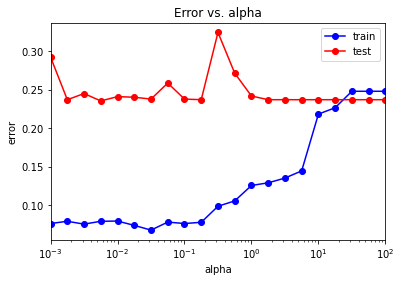

In [1195]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [1196]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.06773333333333334 0.2352


In [1202]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.005623413251903491


### Подставляем гиперпараметр

In [1198]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (10, 70),
                          solver = 'lbfgs', activation = 'logistic', max_iter=1200, random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.07653333333333333
0.2352


C:\Users\sepo0521\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## 9. Матрица разгласования

In [1199]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[954   0]
 [294   2]]


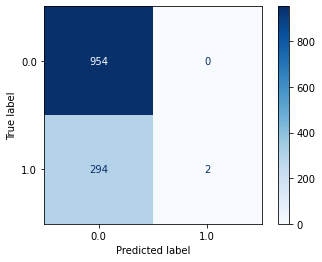

In [1200]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model,X_test, y_test, cmap=plt.cm.Blues)
pass

## 10. Выводы

- В процессе перебора всевозможных значений я выяснил, что минимальное значение на тестовой выборке всегда равно `2,36`. К сожалению, это не зависит от того однослойная или двухслойная сеть. Как следствие, я не смог построить сравнительные графики
- Переобучение происходило, при значениях выше `75` в любом из слоёв
- Недообучение происходило, при значениях ниже `10` в любом из слоёв